In [4]:
from tensorflow import keras
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist
import numpy as np

In [6]:
import tensorflow as tf

In [8]:
print(tf.__version__)

2.18.0


In [10]:
(x_train, _), (x_test, _) = mnist.load_data()

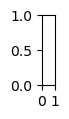

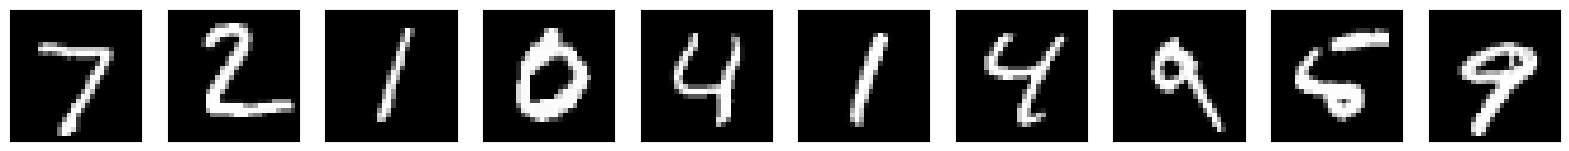

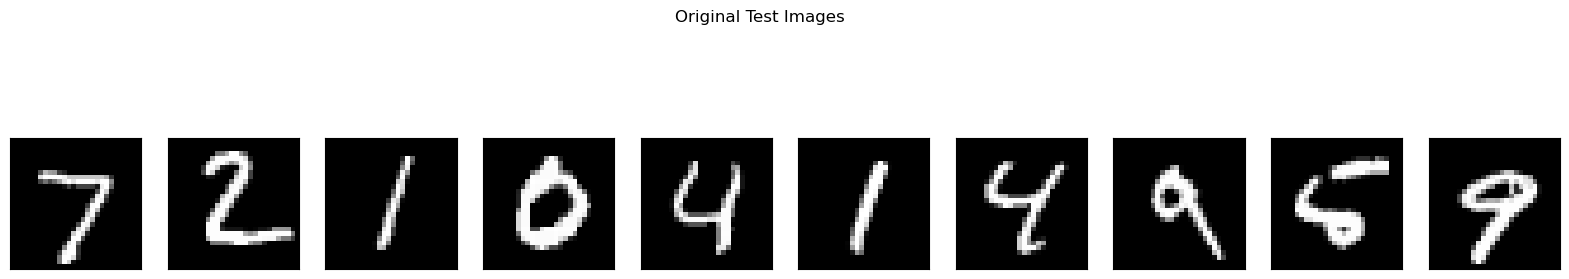

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

n = 10  # how many records we will display
plt.figure(figsize=(20, 4))

for i in range(n):
    # display original
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.suptitle("Original Test Images")
plt.show()

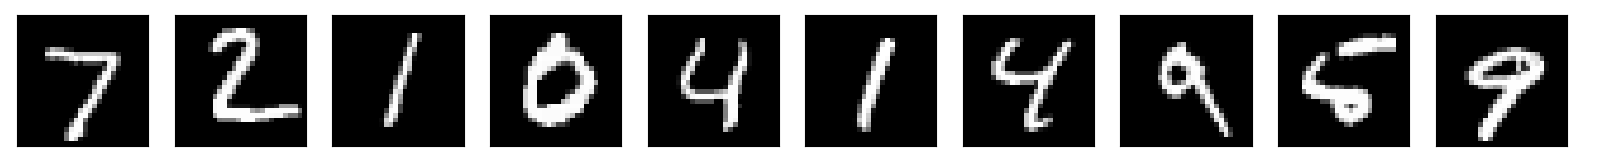

In [18]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, UpSampling2D, Reshape

In [24]:
encode_model = Sequential()

############
# Encoding #
############

## FIRST SET OF LAYERS
# CONVOLUTIONAL LAYER
encode_model.add(Conv2D(filters=16, kernel_size=(3,3), input_shape=(28, 28, 1), activation='relu', padding='same'))
# POOLING LAYER
encode_model.add(MaxPool2D(pool_size=(2, 2),  padding='same'))

## SECOND SET OF LAYERS
# CONVOLUTIONAL LAYER
encode_model.add(Conv2D(filters=8, kernel_size=(3,3), activation = 'relu', padding='same'))
# POOLING LAYER
encode_model.add(MaxPool2D(pool_size=(2, 2), padding='same'))

encode_model.add(Flatten(input_shape=[7,7,8]))
encode_model.add(Dense(7*7*8, activation="relu"))
encode_model.add(Dense(30, activation="relu"))

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [26]:
############
# Decoding #
############
decode_model=Sequential()

decode_model.add(Dense(7*7*8, activation="relu"))
decode_model.add(Reshape([7,7,8]))

# DeConv1
decode_model.add(Conv2D(filters=8, kernel_size=(3,3), activation='relu', padding='same'))
# Upsampling LAYER
decode_model.add(UpSampling2D((2, 2)))

# Deconv2
decode_model.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu', padding='same'))
# POOLING LAYER
decode_model.add(UpSampling2D((2, 2)))

decode_model.add(Conv2D(1, kernel_size=(3,3), activation='sigmoid', padding='same'))


In [34]:
autoencoder = Sequential([encode_model, decode_model], name="CNN_Autoencoder")

In [42]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy', metrics=['accuracy'])

In [52]:
autoencoder.summary()

Model: "CNN_Autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_2 (Sequential)       │ (None, 30)             │       167,166 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_3 (Sequential)       │ (None, 28, 28, 1)      │        14,049 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 181,215 (707.87 KB)

 Trainable params: 181,215 (707.87 KB)

 Non-trainable params: 0 (0.00 B)

In [54]:
from tensorflow.keras import models

In [56]:
autoencoder.save('Conv_autoencoder.keras')

In [58]:
encode_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 28, 28, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 14, 14, 8)      │         1,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 7, 7, 8)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 392)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 392)            │       154,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 30)             │        11,790 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 167,166 (652.99 KB)

 Trainable params: 167,166 (652.99 KB)

 Non-trainable params: 0 (0.00 B)

In [66]:
encode_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 28, 28, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 14, 14, 8)      │         1,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 7, 7, 8)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 392)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 392)            │       154,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 30)             │        11,790 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 167,166 (652.99 KB)

 Trainable params: 167,166 (652.99 KB)

 Non-trainable params: 0 (0.00 B)

In [70]:
x_train = x_train.reshape(60000,28,28,1)
x_train = x_train/255
print(x_train.shape)

(60000, 28, 28, 1)


In [74]:
x_test = x_test.reshape(10000, 28, 28, 1)
x_test = x_test/255
print(x_test.shape)

(10000, 28, 28, 1)


In [80]:
# Train the model

history = autoencoder.fit(x=x_train,
                          y=x_train,
                          epochs=10,
                          batch_size=128,
                          shuffle=True,
                          verbose=1,
                          validation_data=(x_test, x_test))

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - accuracy: 0.8063 - loss: 0.6925 - val_accuracy: 0.7858 - val_loss: 0.6895
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 0.8085 - loss: 0.6894 - val_accuracy: 0.8047 - val_loss: 0.6873
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - accuracy: 0.8094 - loss: 0.6855 - val_accuracy: 0.8072 - val_loss: 0.6841
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - accuracy: 0.8088 - loss: 0.6805 - val_accuracy: 0.8072 - val_loss: 0.6796
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 13s 27ms/step - accuracy: 0.8086 - loss: 0.6737 - val_accuracy: 0.8072 - val_loss: 0.6731
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - accuracy: 0.8088 - loss: 0.6640 - val_accuracy: 0.8072 - val_loss: 0.6633
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 13s 27ms/step - accuracy: 0.8087 - loss: 0.6489 - val_accuracy: 0.8072 - val_loss: 0.6474
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - accuracy: 0.8087 - loss: 0.6227 - 

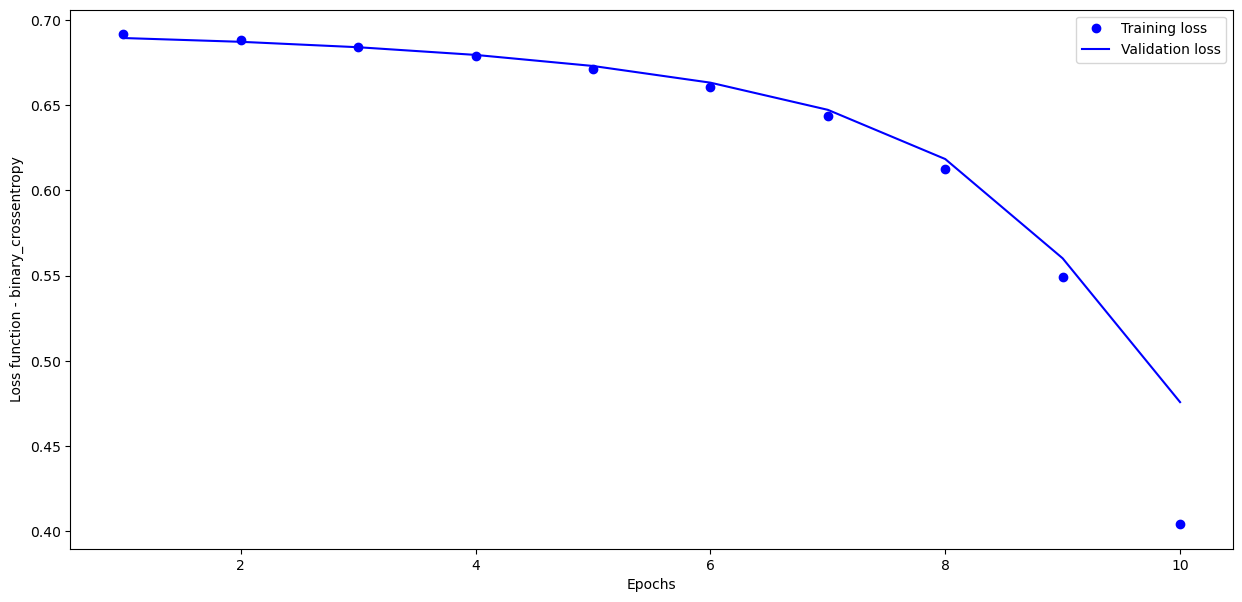

In [82]:
losses = history.history['loss']
losses_val = history.history['val_loss']
epochs = range(1, len(losses) + 1)

plt.figure(num=1, figsize=(15,7))
plt.plot(epochs, losses, 'bo', label='Training loss')
plt.plot(epochs, losses_val, 'b', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss function - binary_crossentropy')
plt.legend()
plt.show()

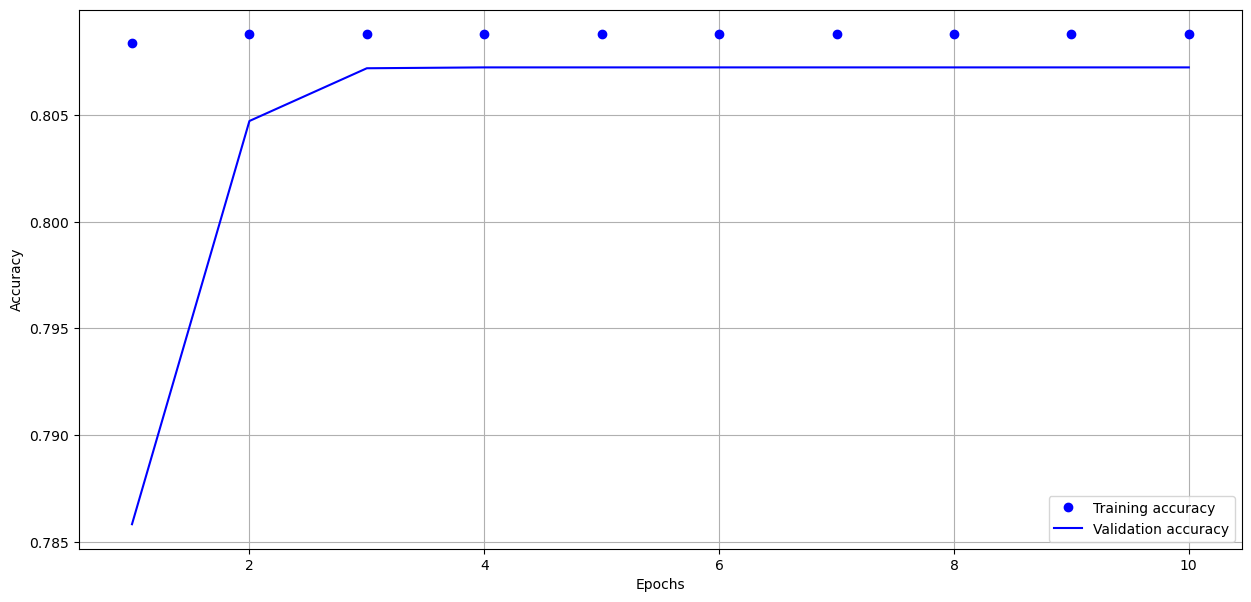

In [94]:
accuracy_array = history.history['accuracy']
val_accuracy_array = history.history['val_accuracy']
epochs = range(1, len(accuracy_array) + 1)

plt.figure(num=2, figsize=(15,7))
plt.plot(epochs, accuracy_array, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy_array, 'b', label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


<Figure size 2000x400 with 0 Axes>

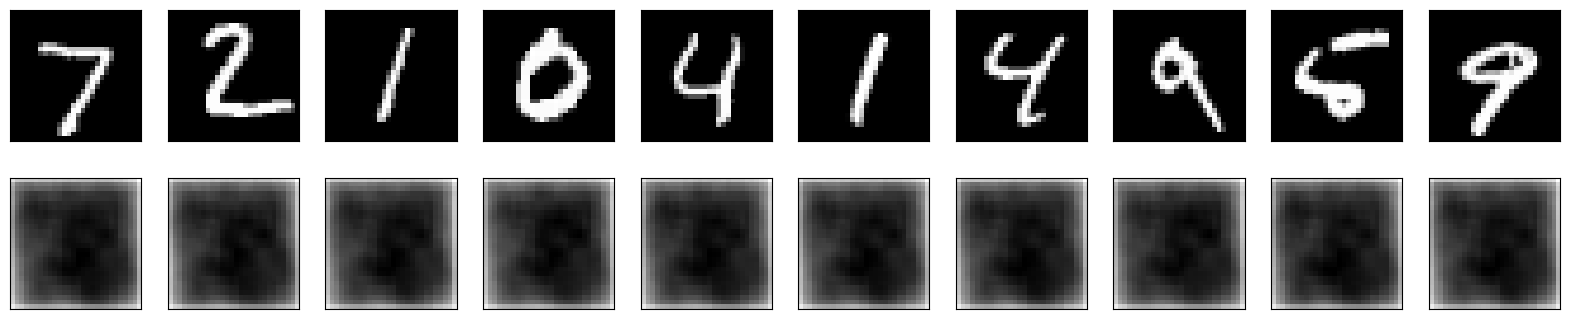

In [98]:
decoded_imgs = autoencoder.predict(x_test)

n = 10

plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

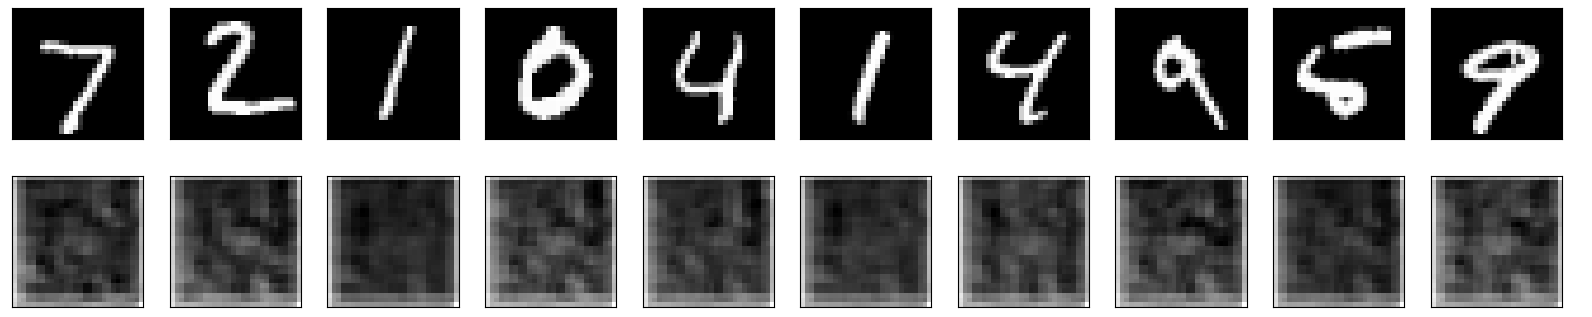

In [5]:
# optimizer is not so good,
# epoch number should be edded

## Lab Logbook requirement:

1) Copy the autoencoder model and train it with epochs=Z+40,
where your SID is: XXXXXXZ
Leave other parameters the same as in Task 2.

2) Please only add to your Lab Logbook print-screens of:
- Table of your model autoencoder.summary()
- Code of your autoencoder.fit()
- Accuracy detailed graph
- Document the plot of the decoded images for task 2. Change the colour, appearance, and shape of the plot according to your own choice (see plt.figure() parameters).


NOTE: DON'T FORGET TO SAVE AND BACK UP YOUR COMPLETED JUPYTER NOTEBOOK AND LAB LOGBOOK ON GITHUB OR ONEDRIVE.

In [ ]:
# autoencoder_2 = models.load_model('Conv_autoencoder.keras')

In [ ]:
# history_2 = 

In [ ]:
#
#
#
